In [265]:
#P1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

#a 
X = X.to_numpy()
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
def seperateData(a, b):
    filtered = (b == 3) | (b == 5)
    X_train = a[filtered]
    y_train = b[filtered]
    return X_train, y_train
X_train_both, y_train_both = seperateData(X_train, y_train)
X_test_both, y_test_both = seperateData(X_test, y_test)
y_train_3 = (y_train_both == 3)
y_test_3 = (y_test_both == 3)
y_train_5 = (y_train_both == 5)
sgd_clf = SGDClassifier()
print("Accuracy: "+ str(cross_val_score(sgd_clf, X_train_both, y_train_3, cv=3, scoring="accuracy")))

Accuracy: [0.95715399 0.94988315 0.9425974 ]


In [120]:
#b
y_train_pred = cross_val_predict(sgd_clf, X_train_both, y_train_3, cv=3)
print("Confusion Matrix:\n" + str(confusion_matrix(y_train_3, y_train_pred)))
print("Precision Score: " + str(precision_score(y_train_3, y_train_pred)))
print("Recall Score: " + str(recall_score(y_train_3, y_train_pred)))
print("F1 Score: " + str(f1_score(y_train_3, y_train_pred)))

Confusion Matrix:
[[5126  295]
 [ 323 5808]]
Precision Score: 0.951663116500082
Recall Score: 0.947316914043386
F1 Score: 0.9494850416871015


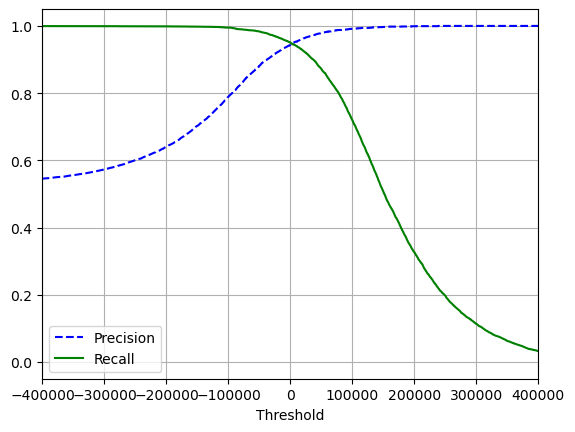

In [121]:
#c
y_scores = cross_val_predict(sgd_clf, X_train_both, y_train_3, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_3, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(loc='best')
    plt.xlim(-400000,400000)
    plt.grid()
    plt.xlabel('Threshold')
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [122]:
#d vector of predictions
#The most sensible threshold according to the graph in part c appears to be around the 0 mark
y_predictions = (y_scores >= 0)
print("Preditions Array: " + str(y_predictions))
print("Precision Score: " + str(precision_score(y_train_3, y_predictions)))
print("Recall Score: " + str(recall_score(y_train_3, y_predictions)))

Preditions Array: [False  True  True ... False  True False]
Precision Score: 0.9437692432344839
Recall Score: 0.9499266025118251


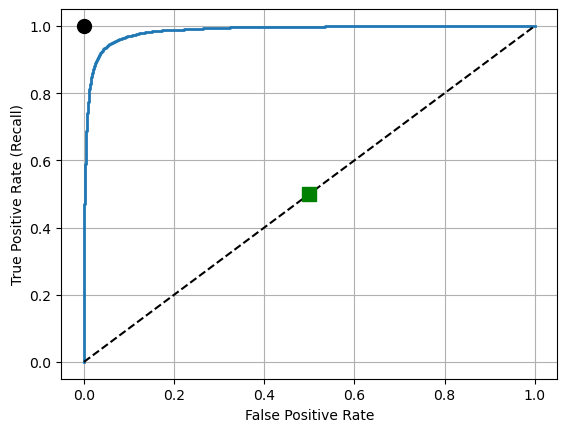

ROC AUC (SGD): 0.9858844064103574


In [123]:
#e
fpr, tpr, thresholds = roc_curve(y_train_3, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.grid()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.plot(0, 1, marker="o", markersize=10,  markeredgecolor="black", markerfacecolor="black")
    plt.plot(0.5, 0.5, marker="s", markersize=10, markeredgecolor="green", markerfacecolor="green")
    
plot_roc_curve(fpr, tpr)
plt.show()
print("ROC AUC (SGD): " + str(roc_auc_score(y_train_3, y_scores)))

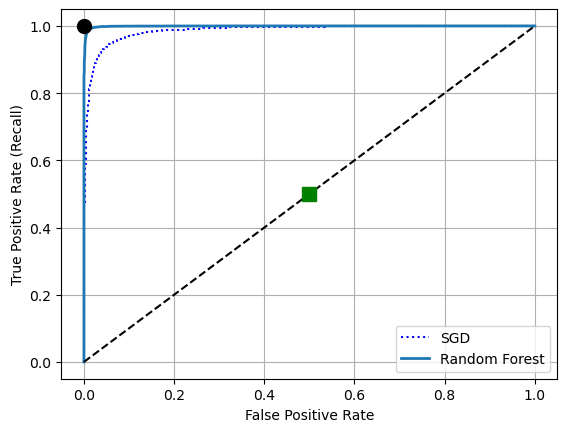

ROC AUC (Random Forest): 0.9992795194606018


In [124]:
#f
forest_clf = RandomForestClassifier()
y_probas_forest = cross_val_predict(forest_clf, X_train_both, y_train_3, cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_3,y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()
print("ROC AUC (Random Forest): " + str(roc_auc_score(y_train_3, y_scores_forest)))

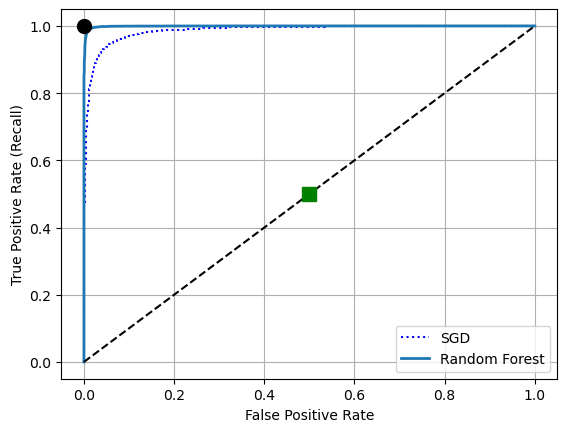

ROC AUC (Random Forest w/ Standard Scaling): 0.9992795194606018


In [125]:
#g
scaler = StandardScaler()
scaled = scaler.fit_transform(y_probas_forest)
y_scores_forest = scaled[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_3,y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()
print("ROC AUC (Random Forest w/ Standard Scaling): " + str(roc_auc_score(y_train_3, y_scores_forest)))

In [176]:
#P2
def no3(a,b):
    filtered = (b != 3)
    X = a[filtered]
    y = b[filtered]
    return X, y    
def no5(a,b):
    filtered = (b != 5)
    X = a[filtered]
    y = b[filtered]
    return X, y     

X_no5, y_no5 = no5(X_train, y_train)
y3_train = (y_train_no5 == 3)
X_no3, y_no3 = no3(X_train, y_train)
y5_train = (y_train_no3 == 5)
y_neither = (y_train != 3) & (y_train != 5)

1        False
2        False
3        False
4        False
5        False
         ...  
59994    False
59995    False
59996     True
59998    False
59999    False
Name: class, Length: 54579, dtype: bool


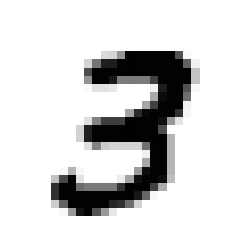

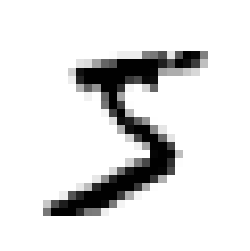

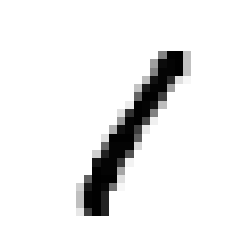

In [127]:
def imageMaker(a):
    image = a.reshape(28,28)
    plt.figure(figsize=(3,3))
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    plt.show()    

test_digit_1 = X[7] #Randomly choosen 3 digit from dataset
test_digit_2 = X[0] #Randomly choosen 5 digit from dataset
test_digit_3 = X[3] #Randomly choosen others digit from dataset
imageMaker(test_digit_1)
imageMaker(test_digit_2)
imageMaker(test_digit_3)

In [198]:
def predictor(a, b, c):
    sgd_clf.fit(a, b)
    return sgd_clf.predict([c])
def duels(a):
    truth = predictor(X_train, y_neither, a) #Checks whether the digit is an 'others'
    if truth:
        truth = predictor(X_no5, y3_train, a) #Uses the '3 vs others' classifier
        if truth:
            return 3
        truth = predictor(X_no3, y5_train, a) #Uses the '5 vs others' classifier
        if truth:
            return 5
        else:
            return 0
    else:
        truth = predictor(X_train_both, y_train_3, a) #Uses the '3 vs 5' classifier to check for 3
        if truth:
            truth = predictor(X_no5, y3_train, a) #Uses the '3 vs others' classifier
            if truth:
                return 3
        truth = predictor(X_train_both, y_train_5, a) #Uses the '3 vs 5' classifier to check for 5
        if truth:
            truth = predictor(X_no3, y5_train, a) #Uses the '5 vs others' classifier
            if truth:
                return 5
stor3 = 0
stor5 = 0
storOthers = 0

In [199]:
def counter(a):
    if(predicted == 3):
        global stor3
        stor3 += 1
        print("Adding to Total Predicted 3's...")
        print("Total Predicted 3's: " + str(stor3))
    if(predicted == 5):
        global stor5
        stor5 += 1
        print("Adding to Total Predicted 5's...")
        print("Total Predicted 5's: " + str(stor5))
    if(predicted == 0):
        global storOthers
        storOthers += 1
        print("Adding to Total Predicted Others...")
        print("Total Predicted Others: " + str(storOthers))    

predicted = duels(test_digit_1) #tests a 3 digit
counter(predicted)  
predicted = duels(test_digit_2) #tests a 5 digit
counter(predicted)  
predicted = duels(test_digit_3) #tests an others digit
counter(predicted)  

Adding to Total Predicted 3's...
Total Predicted 3's: 1
Adding to Total Predicted 5's...
Total Predicted 5's: 1
Adding to Total Predicted Others...
Total Predicted Others: 1


In [274]:
#P3
knn_clf = KNeighborsClassifier()
X_test_scaled = scaler.fit_transform(X_test)
param_grid=[
    {'n_neighbors': [3, 4, 5], 'weights': ['uniform']},
    {'n_neighbors': [3, 4, 5], 'weights': ['distance']},
]
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=   6.3s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=   6.3s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=   6.2s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=   6.3s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=   6.2s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=   6.3s
[CV 2/5] END ....n_neighbors=4, weights=uniform;, score=0.968 total time=   6.2s
[CV 3/5] END ....n_neighbors=4, weights=uniform;, score=0.968 total time=   6.3s
[CV 4/5] END ....n_neighbors=4, weights=uniform;, score=0.967 total time=   6.4s
[CV 5/5] END ....n_neighbors=4, weights=uniform;, score=0.970 total time=   6.5s
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.970 total time=   6.5s
[CV 2/5] END ....n_neighbors=5, weights=uniform;,

In [273]:
adjusted_knn = KNeighborsClassifier(n_neighbors = 4, weights='distance')
print("Best Score: " + str(grid_search.best_score_))
y_pred = grid_search.predict(X_test)
print("Accuracy: " + str(accuracy_score(y_test, y_pred)))

Best Score: 0.9716166666666666
Accuracy: 0.9714


In [270]:
conf_mx = confusion_matrix(y_test, y_pred)
print(conf_mx)

[[ 973    1    1    0    0    1    3    1    0    0]
 [   0 1132    2    0    0    0    1    0    0    0]
 [  10    5  995    2    1    0    0   16    3    0]
 [   0    1    3  974    1   14    1    7    4    5]
 [   1    5    0    0  950    0    4    3    0   19]
 [   4    0    0    9    2  862    7    1    3    4]
 [   4    2    0    0    3    3  946    0    0    0]
 [   0   17    4    0    3    0    0  994    0   10]
 [   5    2    4   14    5   11    4    4  920    5]
 [   3    4    2    7    9    4    1   10    1  968]]


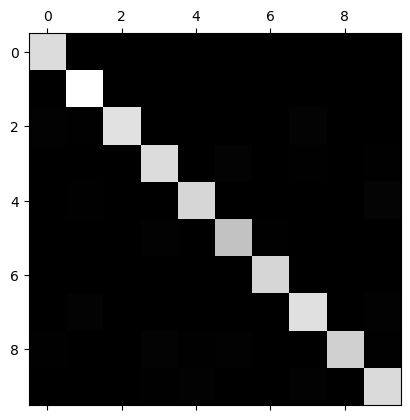

In [271]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

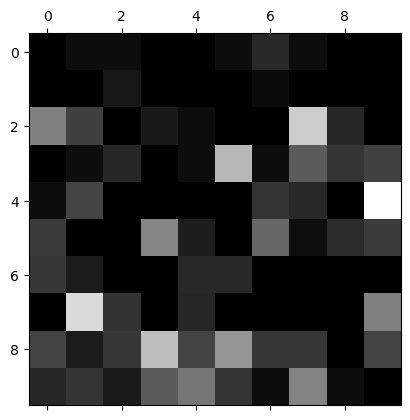

In [272]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
# I feel like some of the errors that can come about from making models is the overfit and underfit of data. For instance
# you can tell from my normalized error analysis that my model is falsely identifying 4's as 9's. In order to adjust this
# I may need to add another feature to compensate for this fact, but adding this feature might jeapordize the accuracy of my
# other numbers. At the end of the day it our jobs is to figure out which hyperparameters work best for our models. There will
# never be a perfect model that is 100% because that would be an example of overfitting for a training set. Models can also very
# easily misinterprut data if not taken accounted for by the data scientist. An example of this would be for a linear regression.
# Data that shows a parabola would be misinterprutted by a linear regression due to the wrong model fit.